In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("Dados/train.csv", sep=",")
test = pd.read_csv("Dados/test.csv", sep=",")
gender = pd.read_csv("Dados/gender_submission.csv", sep=",")

In [3]:
###Verificando os dados

In [4]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [6]:
gender.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [7]:
#Verificando dados e tipos de cada colunas

In [8]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
survived = train.groupby(['Survived']).size()
survived

Survived
0    549
1    342
dtype: int64

In [10]:
pclass = train.groupby(['Pclass']).size()
pclass

Pclass
1    216
2    184
3    491
dtype: int64

In [11]:
sex = train.groupby(['Sex']).size()
sex

Sex
female    314
male      577
dtype: int64

In [12]:
age = train.groupby(['Age']).size()
age

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Length: 88, dtype: int64

In [13]:
sibSp = train.groupby(['SibSp']).size()
sibSp

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64

In [14]:
parch = train.groupby(['Parch']).size()
parch

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64

In [15]:
embarked = train.groupby(['Embarked']).size()
embarked

Embarked
C    168
Q     77
S    644
dtype: int64

<Axes: xlabel='Survived'>

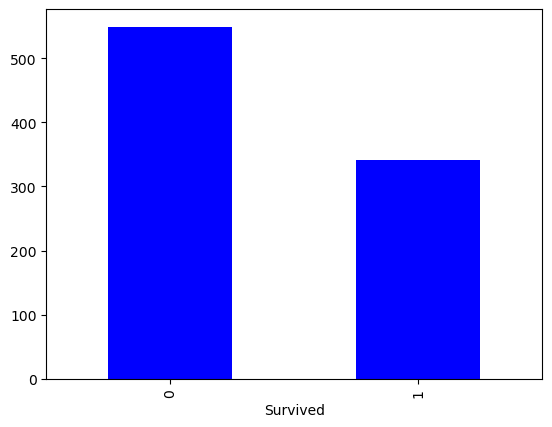

In [16]:
survived.plot.bar(color = 'blue')

In [17]:
#Fazendo graficos para comparar cada coluna com a coluna 'Survived'

<Axes: xlabel='Pclass'>

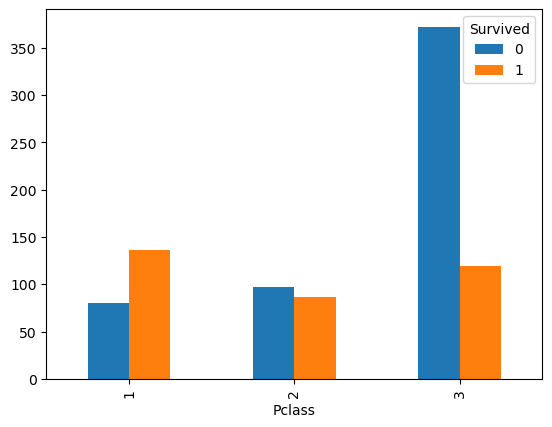

In [18]:
#Pclass
# poderia definir sem o for, usando apenas: ordem = [1, 2, 3] 
#mas em colunas com mais categorias pode ficar mais longo definir cada variavel
ordem = []
for key in pclass.keys(): ordem.append(key)
    
train.groupby('Survived')['Pclass'].value_counts().unstack(0).loc[ordem].plot.bar()

<Axes: xlabel='Sex'>

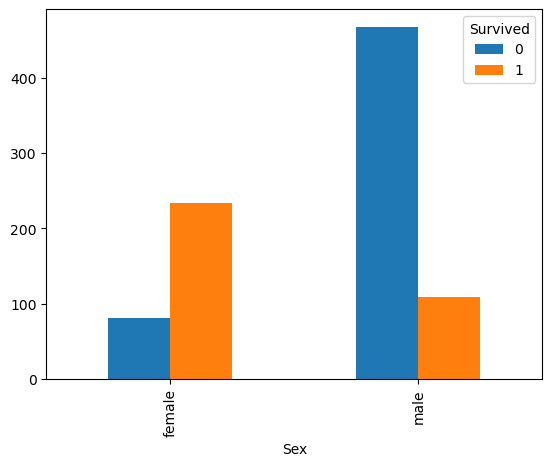

In [19]:
#Sex
ordem = []
for key in sex.keys(): ordem.append(key)

train.groupby('Survived')['Sex'].value_counts().unstack(0).loc[ordem].plot.bar()

<Axes: xlabel='Count', ylabel='Age'>

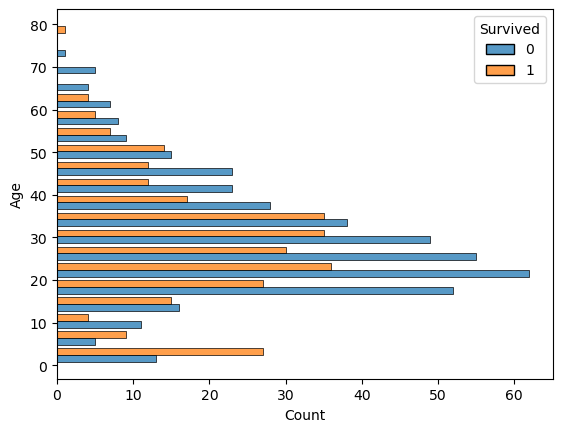

In [20]:
#Age
plot = sns.histplot(data=train, y="Age", hue="Survived", multiple="dodge", shrink=.8)

plot

<Axes: xlabel='SibSp'>

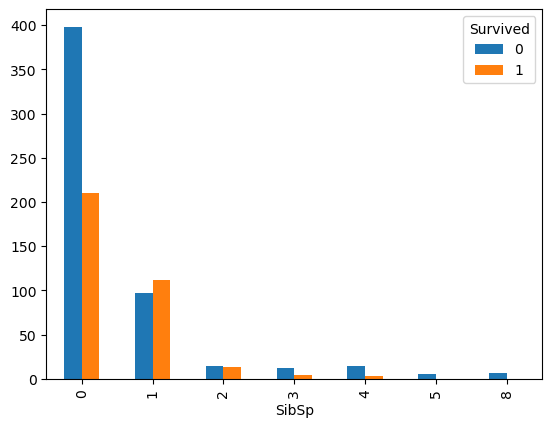

In [21]:
#SibSp
ordem = []
for key in sibSp.keys(): ordem.append(key)
    
train.groupby('Survived')['SibSp'].value_counts().unstack(0).loc[ordem].plot.bar()

<Axes: xlabel='Parch'>

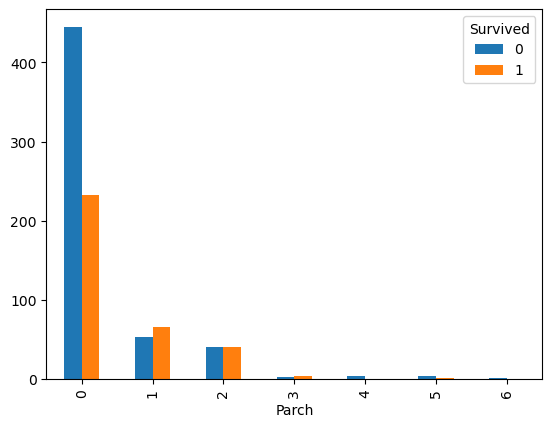

In [25]:
#Parch
ordem = []
for key in parch.keys(): ordem.append(key)
    
train.groupby('Survived')['Parch'].value_counts().unstack(0).loc[ordem].plot.bar()

<Axes: xlabel='Embarked'>

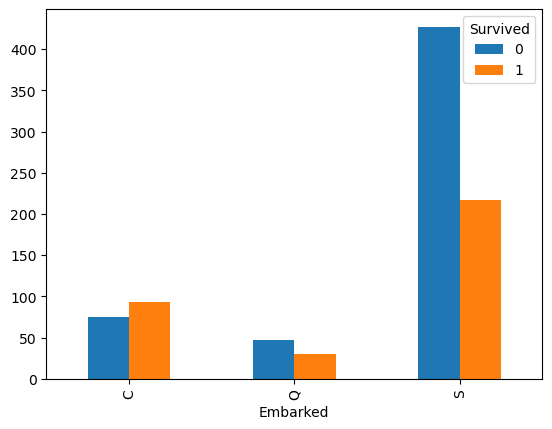

In [45]:
#Embarked
ordem = []
for key in embarked.keys(): ordem.append(key)
    
train.groupby('Survived')['Embarked'].value_counts().unstack(0).loc[ordem].plot.bar(use_index=True)

In [46]:
sobreviventes = train[train.Survived==1]
sobreviventes

PassengerId  Survived  Pclass  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
8              9         1       3   
9             10         1       2   
..           ...       ...     ...   
875          876         1       3   
879          880         1       1   
880          881         1       2   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
..                                                 ...     ...   ...    ...   
875                   Najib, Miss. Adele Kiamie "Jane"  female  15.0      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
880       Shelley, Mrs. William (Imanita Parrish Hall)  female  25.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
889                              Behr, Mr. Karl Howell    male  26.0      0   

     Parch            Ticket     Fare Cabin Embarked  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
8        2            347742  11.1333   NaN        S  
9        0            237736  30.0708   NaN        C  
..     ...               ...      ...   ...      ...  
875      0              2667   7.2250   NaN        C  
879      1             11767  83.1583   C50        C  
880      1            230433  26.0000   NaN        S  
887      0            112053  30.0000   B42        S  
889      0            111369  30.0000  C148        C  

[342 rows x 12 columns]

In [50]:
sex = sobreviventes.groupby(['Sex']).size()
sex

Sex
female    233
male      109
dtype: int64

In [52]:
sobreviventesMasc = sobreviventes[sobreviventes.Sex=="male"]
sobreviventesMasc

PassengerId  Survived  Pclass                             Name   Sex  \
17            18         1       2     Williams, Mr. Charles Eugene  male   
21            22         1       2            Beesley, Mr. Lawrence  male   
23            24         1       1     Sloper, Mr. William Thompson  male   
36            37         1       3                 Mamee, Mr. Hanna  male   
55            56         1       1                Woolner, Mr. Hugh  male   
..           ...       ...     ...                              ...   ...   
838          839         1       3                  Chip, Mr. Chang  male   
839          840         1       1             Marechal, Mr. Pierre  male   
857          858         1       1           Daly, Mr. Peter Denis   male   
869          870         1       3  Johnson, Master. Harold Theodor  male   
889          890         1       1            Behr, Mr. Karl Howell  male   

      Age  SibSp  Parch  Ticket     Fare Cabin Embarked  
17    NaN      0      0  244373  13.0000   NaN        S  
21   34.0      0      0  248698  13.0000   D56        S  
23   28.0      0      0  113788  35.5000    A6        S  
36    NaN      0      0    2677   7.2292   NaN        C  
55    NaN      0      0   19947  35.5000   C52        S  
..    ...    ...    ...     ...      ...   ...      ...  
838  32.0      0      0    1601  56.4958   NaN        S  
839   NaN      0      0   11774  29.7000   C47        C  
857  51.0      0      0  113055  26.5500   E17        S  
869   4.0      1      1  347742  11.1333   NaN        S  
889  26.0      0      0  111369  30.0000  C148        C  

[109 rows x 12 columns]

<Axes: xlabel='Pclass'>

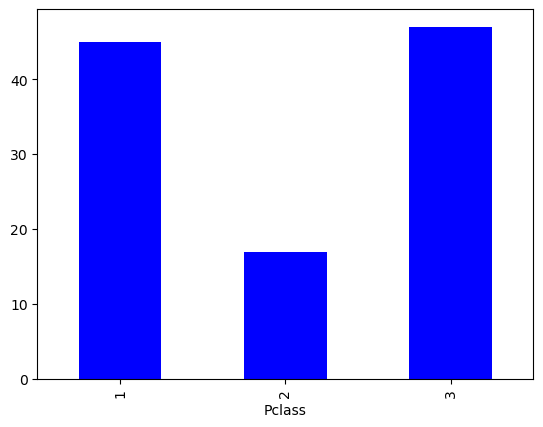

In [54]:
pclass = sobreviventesMasc.groupby(['Pclass']).size()
pclass.plot.bar(color = 'blue')

<Axes: xlabel='SibSp'>

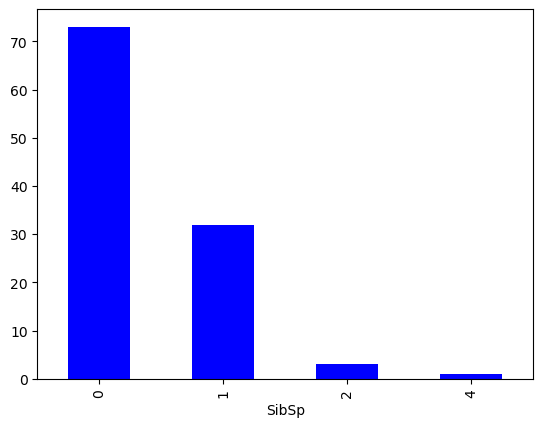

In [55]:
sibSp = sobreviventesMasc.groupby(['SibSp']).size()
sibSp.plot.bar(color = 'blue')

<Axes: xlabel='Parch'>

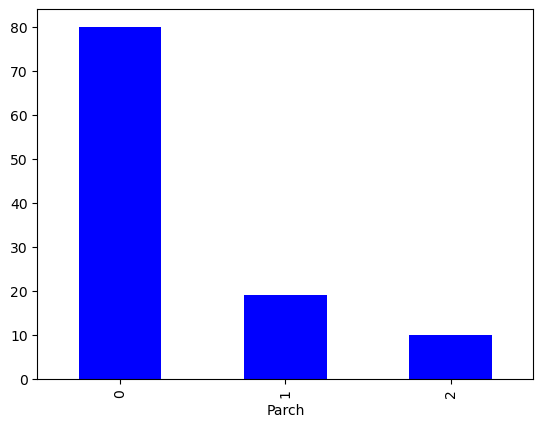

In [56]:
parch = sobreviventesMasc.groupby(['Parch']).size()
parch.plot.bar(color = 'blue')

<Axes: xlabel='Embarked'>

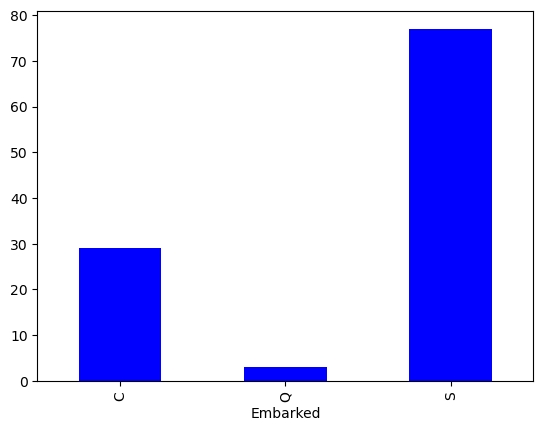

In [57]:
embarked = sobreviventesMasc.groupby(['Embarked']).size()
embarked.plot.bar(color = 'blue')

<Axes: xlabel='Count', ylabel='Age'>

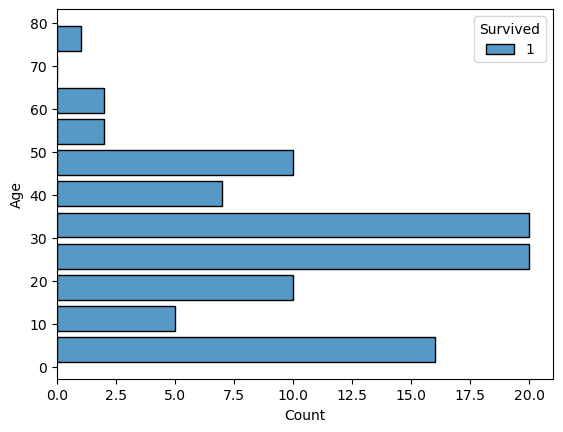

In [59]:
plot = sns.histplot(data=sobreviventesMasc, y="Age", hue="Survived", multiple="dodge", shrink=.8)

plot

In [107]:
criancas = train[(train.Age<=15) & (train.Sex=='male')]
criancas

PassengerId  Survived  Pclass  \
7              8         0       3   
16            17         0       3   
50            51         0       3   
59            60         0       3   
63            64         0       3   
78            79         1       2   
125          126         1       3   
164          165         0       3   
165          166         1       3   
171          172         0       3   
182          183         0       3   
183          184         1       2   
193          194         1       2   
261          262         1       3   
278          279         0       3   
305          306         1       1   
340          341         1       2   
348          349         1       3   
352          353         0       3   
386          387         0       3   
407          408         1       2   
445          446         1       1   
480          481         0       3   
489          490         1       3   
549          550         1       2   
683          684         0       3   
686          687         0       3   
731          732         0       3   
751          752         1       3   
755          756         1       2   
787          788         0       3   
788          789         1       3   
802          803         1       1   
803          804         1       3   
819          820         0       3   
824          825         0       3   
827          828         1       2   
831          832         1       2   
850          851         0       3   
869          870         1       3   

                                                Name   Sex    Age  SibSp  \
7                     Palsson, Master. Gosta Leonard  male   2.00      3   
16                              Rice, Master. Eugene  male   2.00      4   
50                        Panula, Master. Juha Niilo  male   7.00      4   
59                Goodwin, Master. William Frederick  male  11.00      5   
63                             Skoog, Master. Harald  male   4.00      3   
78                     Caldwell, Master. Alden Gates  male   0.83      0   
125                     Nicola-Yarred, Master. Elias  male  12.00      1   
164                     Panula, Master. Eino Viljami  male   1.00      4   
165  Goldsmith, Master. Frank John William "Frankie"  male   9.00      0   
171                             Rice, Master. Arthur  male   4.00      4   
182            Asplund, Master. Clarence Gustaf Hugo  male   9.00      4   
183                        Becker, Master. Richard F  male   1.00      2   
193                       Navratil, Master. Michel M  male   3.00      1   
261                Asplund, Master. Edvin Rojj Felix  male   3.00      4   
278                               Rice, Master. Eric  male   7.00      4   
305                   Allison, Master. Hudson Trevor  male   0.92      1   
340                   Navratil, Master. Edmond Roger  male   2.00      1   
348           Coutts, Master. William Loch "William"  male   3.00      1   
352                               Elias, Mr. Tannous  male  15.00      1   
386                  Goodwin, Master. Sidney Leonard  male   1.00      5   
407                   Richards, Master. William Rowe  male   3.00      1   
445                        Dodge, Master. Washington  male   4.00      0   
480                   Goodwin, Master. Harold Victor  male   9.00      5   
489            Coutts, Master. Eden Leslie "Neville"  male   9.00      1   
549                   Davies, Master. John Morgan Jr  male   8.00      1   
683                      Goodwin, Mr. Charles Edward  male  14.00      5   
686                         Panula, Mr. Jaako Arnold  male  14.00      4   
731                         Hassan, Mr. Houssein G N  male  11.00      0   
751                              Moor, Master. Meier  male   6.00      0   
755                        Hamalainen, Master. Viljo  male   0.67      1   
787                        Rice, Master. George Hugh  male   8.00      4   
788           

<Axes: xlabel='Count', ylabel='Age'>

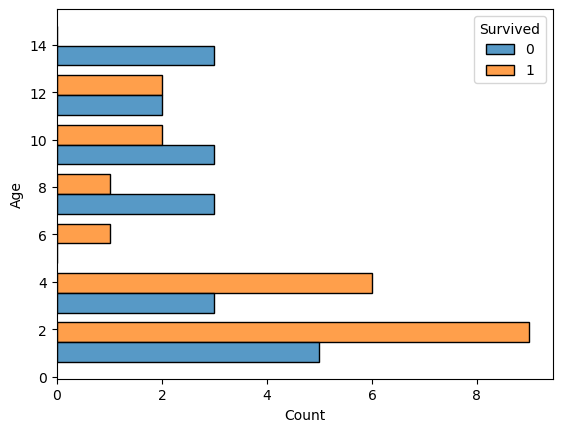

In [108]:
#Age
plot = sns.histplot(data=criancas, y="Age", hue="Survived", multiple="dodge", shrink=.8)

plot

<Axes: xlabel='Pclass'>

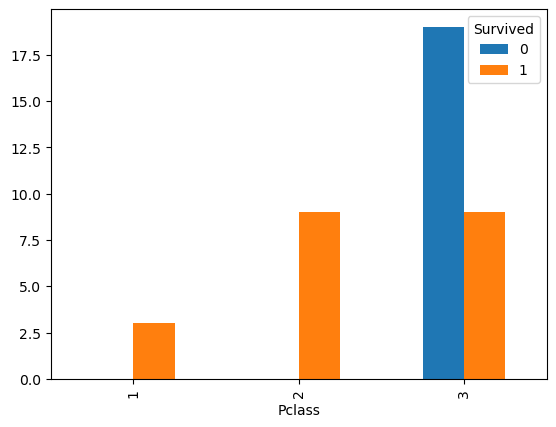

In [109]:
ordem = []
for key in pclass.keys(): ordem.append(key)
    
criancas.groupby('Survived')['Pclass'].value_counts().unstack(0).loc[ordem].plot.bar()

In [110]:
males =  train[train.Sex=='male']

<Axes: xlabel='Pclass'>

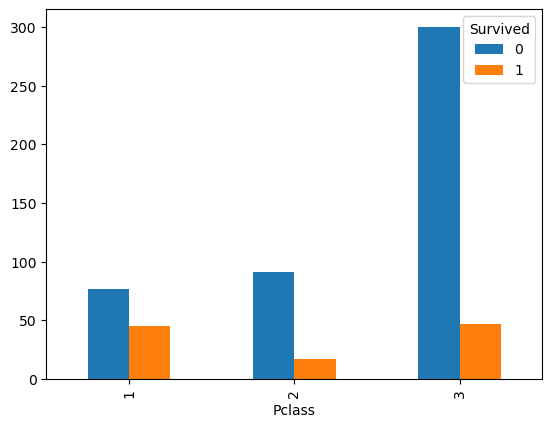

In [111]:
ordem = []
for key in pclass.keys(): ordem.append(key)
    
males.groupby('Survived')['Pclass'].value_counts().unstack(0).loc[ordem].plot.bar()

<Axes: xlabel='SibSp'>

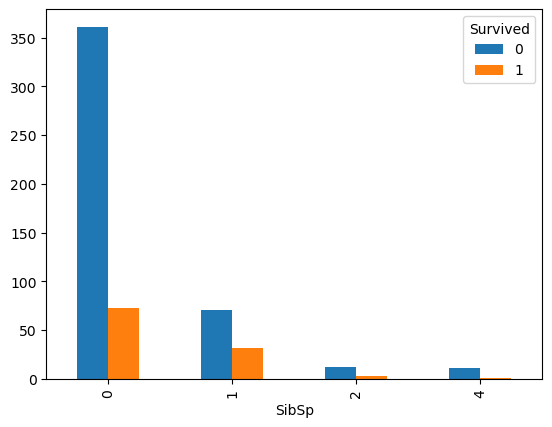

In [113]:
ordem = []
for key in sibSp.keys(): ordem.append(key)
    
males.groupby('Survived')['SibSp'].value_counts().unstack(0).loc[ordem].plot.bar()

<Axes: xlabel='Parch'>

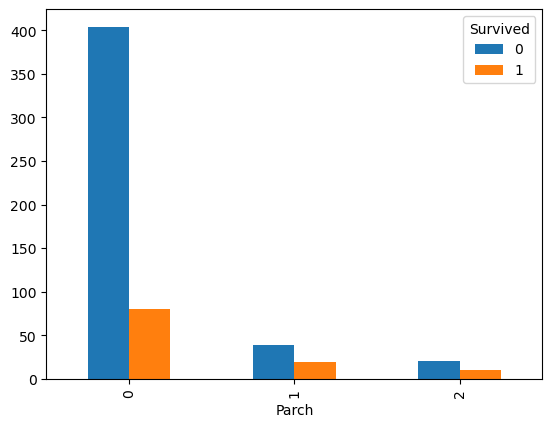

In [114]:
ordem = []
for key in parch.keys(): ordem.append(key)
    
males.groupby('Survived')['Parch'].value_counts().unstack(0).loc[ordem].plot.bar()

In [118]:
semParentes = train[(train.Parch==0) & (train.SibSp==0)]

semParentes

PassengerId  Survived  Pclass                          Name     Sex  \
2              3         1       3        Heikkinen, Miss. Laina  female   
4              5         0       3      Allen, Mr. William Henry    male   
5              6         0       3              Moran, Mr. James    male   
6              7         0       1       McCarthy, Mr. Timothy J    male   
11            12         1       1      Bonnell, Miss. Elizabeth  female   
..           ...       ...     ...                           ...     ...   
884          885         0       3        Sutehall, Mr. Henry Jr    male   
886          887         0       2         Montvila, Rev. Juozas    male   
887          888         1       1  Graham, Miss. Margaret Edith  female   
889          890         1       1         Behr, Mr. Karl Howell    male   
890          891         0       3           Dooley, Mr. Patrick    male   

      Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
2    26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
4    35.0      0      0            373450   8.0500   NaN        S  
5     NaN      0      0            330877   8.4583   NaN        Q  
6    54.0      0      0             17463  51.8625   E46        S  
11   58.0      0      0            113783  26.5500  C103        S  
..    ...    ...    ...               ...      ...   ...      ...  
884  25.0      0      0   SOTON/OQ 392076   7.0500   NaN        S  
886  27.0      0      0            211536  13.0000   NaN        S  
887  19.0      0      0            112053  30.0000   B42        S  
889  26.0      0      0            111369  30.0000  C148        C  
890  32.0      0      0            370376   7.7500   NaN        Q  

[537 rows x 12 columns]

<Axes: xlabel='Pclass'>

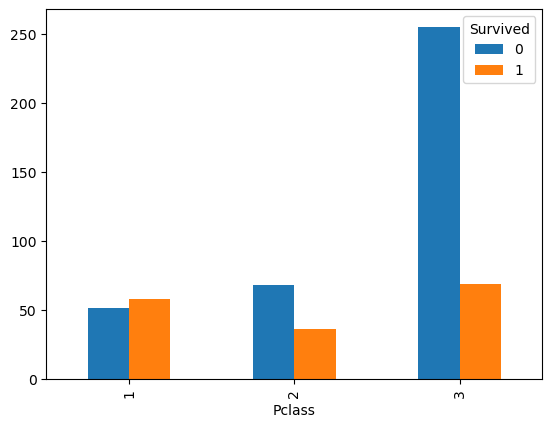

In [119]:
ordem = []
for key in pclass.keys(): ordem.append(key)
    
semParentes.groupby('Survived')['Pclass'].value_counts().unstack(0).loc[ordem].plot.bar()

<Axes: xlabel='Count', ylabel='Age'>

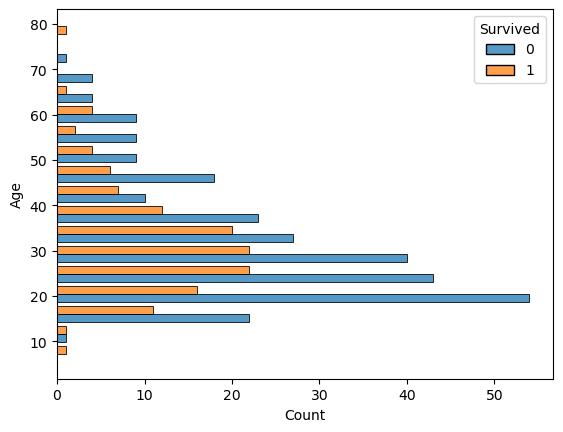

In [120]:
plot = sns.histplot(data=semParentes, y="Age", hue="Survived", multiple="dodge", shrink=.8)

plot

<Axes: xlabel='Embarked'>

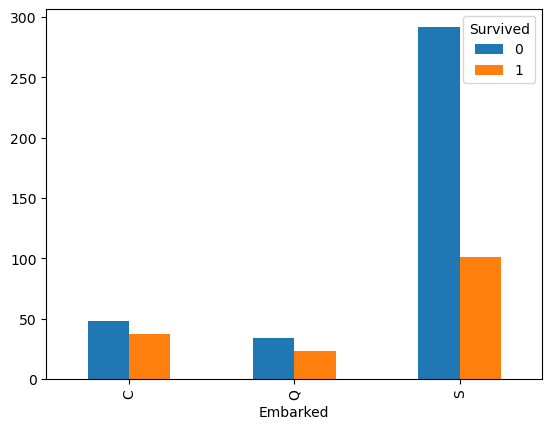

In [122]:
ordem = []
for key in embarked.keys(): ordem.append(key)
    
semParentes.groupby('Survived')['Embarked'].value_counts().unstack(0).loc[ordem].plot.bar(use_index=True)